<a href="https://colab.research.google.com/github/beinganiz/EDA_Data_Analysis/blob/main/Oil_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil Pipeline Accidents, 2010-Present

# Download Data

In [ ]:
#Todo-Talk About EDA
#Todo-Talk About The Dataset(Source,What it Contain,How it will be useful)
#-kaggle
#-Information about accidents
#-Can be usefull to prevent accident

In [ ]:
pip install opendatasets

     |████████████████████████████████| 83 kB 5.0 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 18.2 MB/s            
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=73000e9a8754461bceebc591c35ab53ad5be686d5a8e0b5214a7a9929a866a65
  Stored in directory: /home/jovyan/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/usdot/pipeline-accidents'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammedanizansari
Your Kaggle Key: ········


100%|██████████| 203k/203k [00:00<00:00, 228kB/s]

In [ ]:
data='pipeline-accidents/database.csv'

## **Data Preparation And Cleaning **

1.   load the file using pandas

1.   load at some information about hte file
2.   fix any missing or incorrect values







In [ ]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#reading csv file From Location
df=pd.read_csv(data)
# Columns We Have
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [ ]:
#Take Out the Numeric Value From Data
lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = df.select_dtypes(include=lst)


In [ ]:
null=numeric_data.isna().sum().sort_values(ascending=False)

In [ ]:
missing_value=null[null!=0]

In [ ]:
missum=missing_value.sum()
missing_value

Emergency Responder Fatalities          2787
Operator Contractor Fatalities          2787
Operator Employee Fatalities            2787
Public Fatalities                       2787
All Fatalities                          2787
Other Fatalities                        2787
Operator Employee Injuries              2783
All Injuries                            2783
Other Injuries                          2783
Emergency Responder Injuries            2783
Operator Contractor Injuries            2783
Public Injuries                         2783
Intentional Release (Barrels)           1586
Public Evacuations                       457
Other Costs                               16
Public/Private Property Damage Costs      10
Environmental Remediation Costs            8
Property Damage Costs                      7
Emergency Response Costs                   6
Lost Commodity Costs                       4
dtype: int64

In [ ]:
missum

35514

<AxesSubplot:>

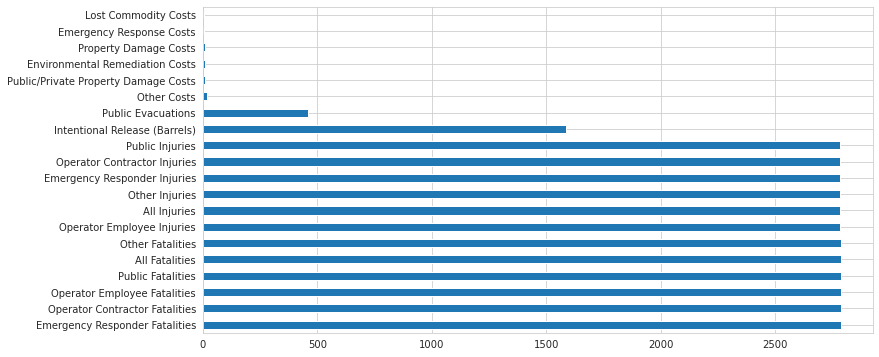

In [ ]:
plt.figure(figsize=(12,6))
missing_value.plot(kind='barh')

# Exploratory Analysis And Visualizations


## Column we'll analyze :

In [ ]:
#1.Accident Year
#2.Accident City
#4.Liquid Explosion
#5.Liquid Type
#6.Accident State
#7.Accident County
#8.Public Evacuations
#9.All Injuries
#10.Property Damage Costs
#11.Environmental Remediation Costs

In [ ]:
df['Accident Year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2790    2016
2791    2016
2792    2016
2793    2017
2794    2017
Name: Accident Year, Length: 2795, dtype: int64

## Accident Happen in Each Year

Text(0.5, 1.0, 'Top 10 Country Having Pipeline Accident')

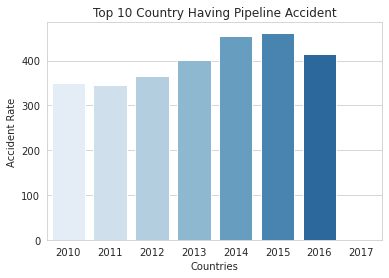

In [ ]:
co=df['Accident Year'].value_counts()
year=co.index.tolist()
acc=co.tolist()
sea.barplot(x=year,y=acc,palette='Blues')
plt.xlabel('Countries')
plt.ylabel('Accident Rate')
plt.title('Top 10 Country Having Pipeline Accident')


## Accident Happen most according to country

Text(0.5, 1.0, 'Top 10 Country Having Pipeline Accident')

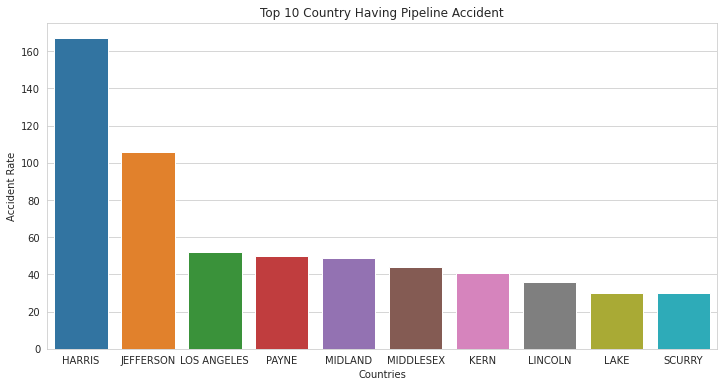

In [ ]:
con=df['Accident County'].value_counts()[:10]

plt.figure(figsize=(12,6))
cou = con.index.tolist()
count = con.tolist()
sea.barplot(x=cou,y=count)
plt.xlabel('Countries')
plt.ylabel('Accident Rate')
plt.title('Top 10 Country Having Pipeline Accident')



## Top 10 state  Having Accidents


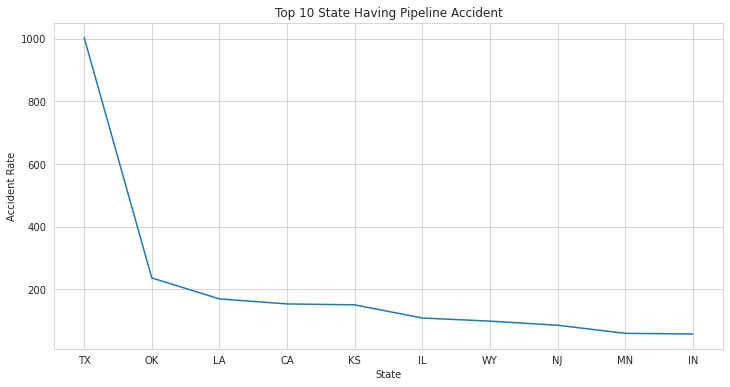

In [ ]:
asc=df['Accident State'].value_counts()[:10]
sta=asc.index.tolist()
tot=asc.tolist()
plt.figure(figsize=(12,6))
sea.lineplot(x=sta,y=tot)
plt.xlabel('State')
plt.ylabel('Accident Rate')
plt.title('Top 10 State Having Pipeline Accident')
sea.set_style('whitegrid')


## Top 10 Country Which Face Liquid Explosion

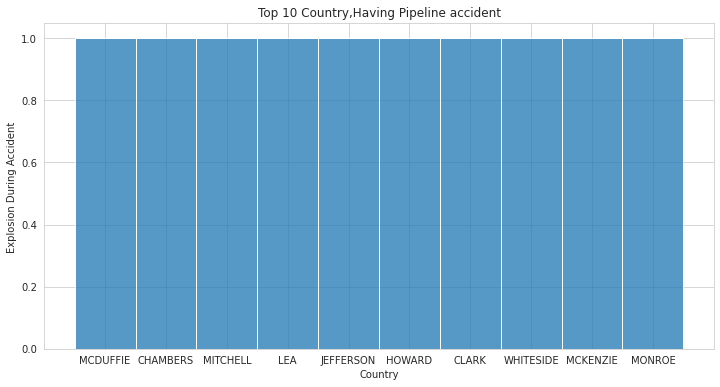

In [ ]:
explosion=df[df['Liquid Explosion']=='YES']['Accident County']
contry_exp=explosion.value_counts()[:10]
contry=contry_exp.index.tolist()
count=contry_exp.tolist()
plt.figure(figsize=(12,6))
sea.histplot(contry)
plt.xlabel('Country')
plt.ylabel('Explosion During Accident ')
plt.title('Top 10 Country,Having Pipeline accident')
sea.set_style('whitegrid')

## Accidents occur by an hour
#The following lines have been commented out
#year = date.dt.year
#month = date.dt.month
#day = date.dt.day
#hour = date.dt.hour
#minute = date.dt.minute
#second = date.dt.second
#days=data.dt.dateofweek


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.YTick at 0x7efff8e7bc10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

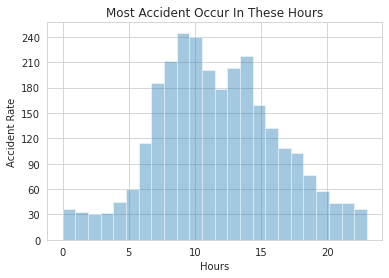

In [ ]:
date = pd.to_datetime(df['Accident Date/Time'])
hour=date.dt.hour
day=date.dt.dayofweek.value_counts()
sea.distplot(hour,bins=24,kde=False) #kde is false so that we can put value according to use like i am doing in yticks
plt.title('Most Accident Occur In These Hours')
plt.xlabel('Hours')
plt.ylabel('Accident Rate')

plt.yticks(np.arange(0,250,30))


## Accidents occur by Weekdays

([<matplotlib.patches.Wedge at 0x7efff8b24ee0>,
 [Text(1.0067106726817465, 0.6530954153174447, 'Monday'),
  Text(-0.15220607208755937, 1.0894187953306465, 'Tuesday'),
  Text(-1.03219756318856, 0.3802212389485876, 'Wednesday'),
  Text(-0.852195806958287, -0.6955302341399072, 'Thursday'),
  Text(0.06980985898568358, -1.0977825757354684, 'Friday'),
  Text(0.7661475027076613, -0.7893148953965169, 'Saturday'),
  Text(1.062170935932165, -0.2859945853700534, 'Sunday')],
 [Text(0.5872478923976855, 0.3809723256018427, '18.3%'),
  Text(-0.08302149386594146, 0.5942284338167162, '17.8%'),
  Text(-0.5630168526483054, 0.20739340306286594, '16.6%'),
  Text(-0.4648340765227019, -0.3793801277126766, '16.5%'),
  Text(0.038078104901281946, -0.59879049585571, '13.8%'),
  Text(0.4178986378405425, -0.43053539748900915, '8.7%'),
  Text(0.5793659650539081, -0.15599704656548366, '8.4%')])

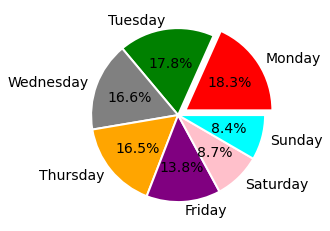

In [ ]:

te={'color':'black','fontsize':14}
we={'edgecolor':'white','linewidth':2}
lab=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
col= ['red', 'green', 'grey', 'orange', 'purple', 'pink', 'cyan']


plt.pie(day, autopct='%0.1f%%',explode=[0.1,0,0,0,0,0,0],textprops=te,wedgeprops=we,labels=lab ,colors=col)


## Injuries happend in each city

<AxesSubplot:>

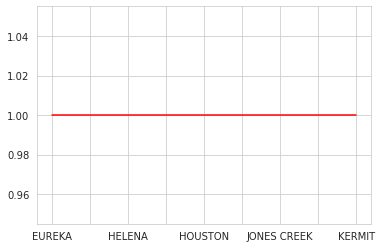

In [ ]:
injury=df.dropna(subset=['All Injuries'])
cit=injury['Accident City'].value_counts()
citname=cit.sort_index()[:5]#sort_index() used to sort the index value sort.values() this sort values
citname.plot(kind='line',color='red')


## Property damage cost in each city

In [ ]:
#for index, value in enumerate(damage):: This for loop iterates through the values in the damage Series, where index represents the position (row) of each value, and value represents the actual value itself.

#plt.text(value, index, str(value), ha='right', va='center', color='black'): Within the loop, plt.text() is used to add text annotations to the plot. Here's what each argument does:

#value: This is the x-coordinate where the text will be placed. In your case, it's the numerical value from the damage Series.
#index: This is the y-coordinate where the text will be placed. It corresponds to the position of the value in the loop (i.e., the row index).
#str(value): This is the text that will be displayed, converted to a string.
#ha='right': This specifies the horizontal alignment of the text. 'right' means the text will be right-aligned with the value coordinate.
#va='center': This specifies the vertical alignment of the text. 'center' means the text will be vertically centered on the index coordinate.
#color='black': This sets the color of the text to black.

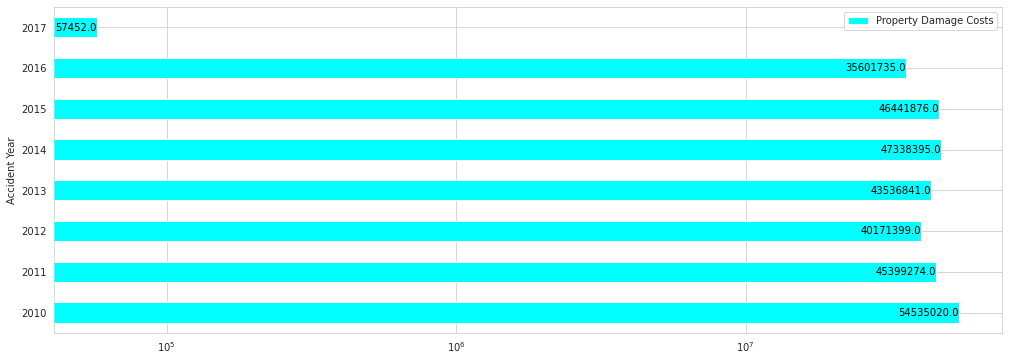

In [ ]:
damage= df.groupby('Accident Year')['Property Damage Costs'].sum()
plt.figure(figsize=(17,6))
damage.plot(kind='barh',logx=True,legend=True,color='cyan')
for index, value in enumerate(damage):
    plt.text(value, index, str(value), ha='right', va='center',color='Black')


In [ ]:
damage

Accident Year
2010    54535020.0
2011    45399274.0
2012    40171399.0
2013    43536841.0
2014    47338395.0
2015    46441876.0
2016    35601735.0
2017       57452.0
Name: Property Damage Costs, dtype: float64

## Environmental Remediation Costs By Year

<Figure size 720x432 with 0 Axes>

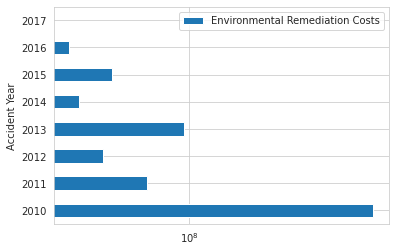

<Figure size 720x432 with 0 Axes>

In [ ]:
erc= df.groupby('Accident Year')['Environmental Remediation Costs'].sum()
erc.plot(kind='barh',logx=True,legend=True)
plt.figure(figsize=(10,6))

## Public Evacuation By City

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Accident City', ylabel='Density'>

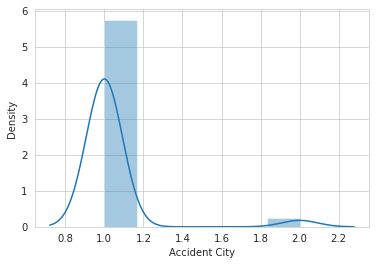

In [ ]:
eva=df[df['Public Evacuations']>0]
eva=eva['Accident City'].value_counts()
sea.distplot(eva)

# Ask And Answer Question About The Data

In [ ]:
#1)calculate how much  Accident Happen in Each Year
#2)which country has the Highest accident Top 5
#3)Name Top 5 state From Each Country
#4)liquid explosion country
#5) injuries happen in each city
#6)property damage cost in each city
#7)public evacuation  happen in which city top 5


# Summary And Conclusion

##### Data has so much missing values  approx more than 35K details are missing
##### Most of The Accident Took Place in year 2015 maybe
##### Place Harris had More Accident Because of Climate Change
##### According To Data Upto 16 Country Faces Liquid Explosion 💥 Which Cost So Much Life
##### Most of The Accident Took Place in The Morning And Monday is the Day
##### Property damage cost is in Billions Or Millions
##### Environment Damage Cost is More Than That
##### Only two three City have Have A Data Of Public Evacuation

